In [27]:
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
import gmaps
import scipy.stats as st

# Census & gmaps API Keys
from config import (census_key, google_key)
c = Census(census_key, year=2016)

# Configure gmaps
gmaps.configure(api_key=google_key)

In [11]:
# The path to our CSV file
csv_path = "merged_file.csv"
result_df = pd.read_csv(csv_path)

result_df.columns

Index(['Unnamed: 0', 'State', 'State Abbr', 'County', 'DEM Votes', 'GOP Votes',
       'Total Votes', 'DEM %', 'GOP %', 'Total Population',
       'Population (White)', 'Population (African-American)',
       'Population (Asian)', 'Population (Hispanic)', 'Median Age',
       'Median Age (Male)', 'Median Age (Female)', 'Education (None)',
       'Education (High School)', 'Education (GED)', 'Education (Associates)',
       'Education (Bachelors)', 'Education (Masters)',
       'Education (Professional)', 'Education (Doctorate)', 'Median Income',
       'Income Per Capita', 'Median Home Value', 'Pop in Labor Force',
       'Pop Not in Labor Force', 'Unemployed'],
      dtype='object')

In [12]:
# The path to our CSV file
csv_path = "indiana_census2.csv"
census_df = pd.read_csv(csv_path)

census_df

,Unnamed: 0,County,State,Median Income,Income Per Capita,Pop in Labor Force,Pop not in Labor Force,Unemployed,Median Age,Median Age (male),Median Age (female)
0,759,Adams County,Indiana,47572.0,21173.0,15975.0,8948.0,872.0,33.7,32.0,36.0
1,760,Allen County,Indiana,49574.0,26058.0,186706.0,93216.0,13152.0,35.6,34.6,36.7
2,761,Bartholomew County,Indiana,55874.0,28631.0,41710.0,21169.0,2165.0,37.9,36.4,39.1
3,762,Benton County,Indiana,48069.0,23181.0,4368.0,2364.0,201.0,40.5,37.4,42.5
4,763,Blackford County,Indiana,38791.0,21980.0,5763.0,4263.0,480.0,43.4,42.1,45.8
...,...,...,...,...,...,...,...,...,...,...,...
87,846,Washington County,Indiana,44883.0,22096.0,13035.0,8910.0,1128.0,41.0,39.8,43.1
88,847,Wayne County,Indiana,39691.0,22227.0,30948.0,23288.0,2257.0,40.9,39.3,42.7
89,848,Wells County,Indiana,51568.0,24544.0,14115.0,7669.0,533.0,40.7,38.5,42.3
90,849,White County,Indiana,51547.0,25859.0,12026.0,7269.0,652.0,42.3,41.0,43.7


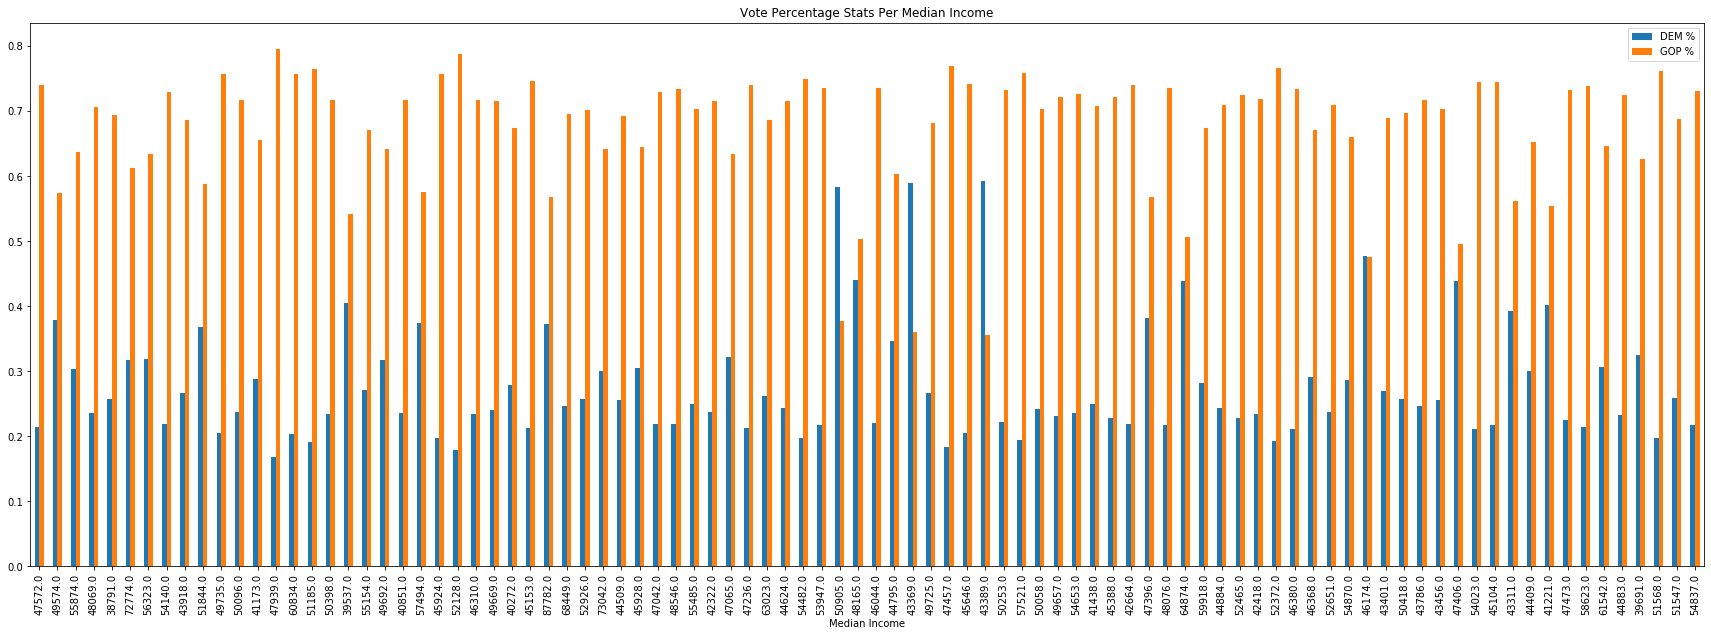

<Figure size 432x288 with 0 Axes>

In [33]:
income_vote_share = result_df[['County', 'DEM %', 'GOP %', 'Median Income']]
income_vote_share.plot(x='Median Income', kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Vote Percentage Stats Per Median Income")

plt.show()
plt.tight_layout()

In [14]:
income_vote_share

,County,DEM %,GOP %,Median Income
0,Adams County,0.214894,0.739474,47572.0
1,Allen County,0.378785,0.574818,49574.0
2,Bartholomew County,0.303838,0.637161,55874.0
3,Benton County,0.235359,0.705802,48069.0
4,Blackford County,0.257777,0.694525,38791.0
...,...,...,...,...
87,Washington County,0.232595,0.724080,44883.0
88,Wayne County,0.325396,0.626706,39691.0
89,Wells County,0.196982,0.761945,51568.0
90,White County,0.258837,0.688043,51547.0


In [38]:
# A function to create Linear Regression plots
def linear_regression_plotter(xaxis, yaxis):   
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
    regress_values = xaxis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xaxis, yaxis)
    plt.plot(xaxis,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"R squared: {rvalue}")

<Figure size 1440x720 with 0 Axes>

R squared: -0.0004685945303763586


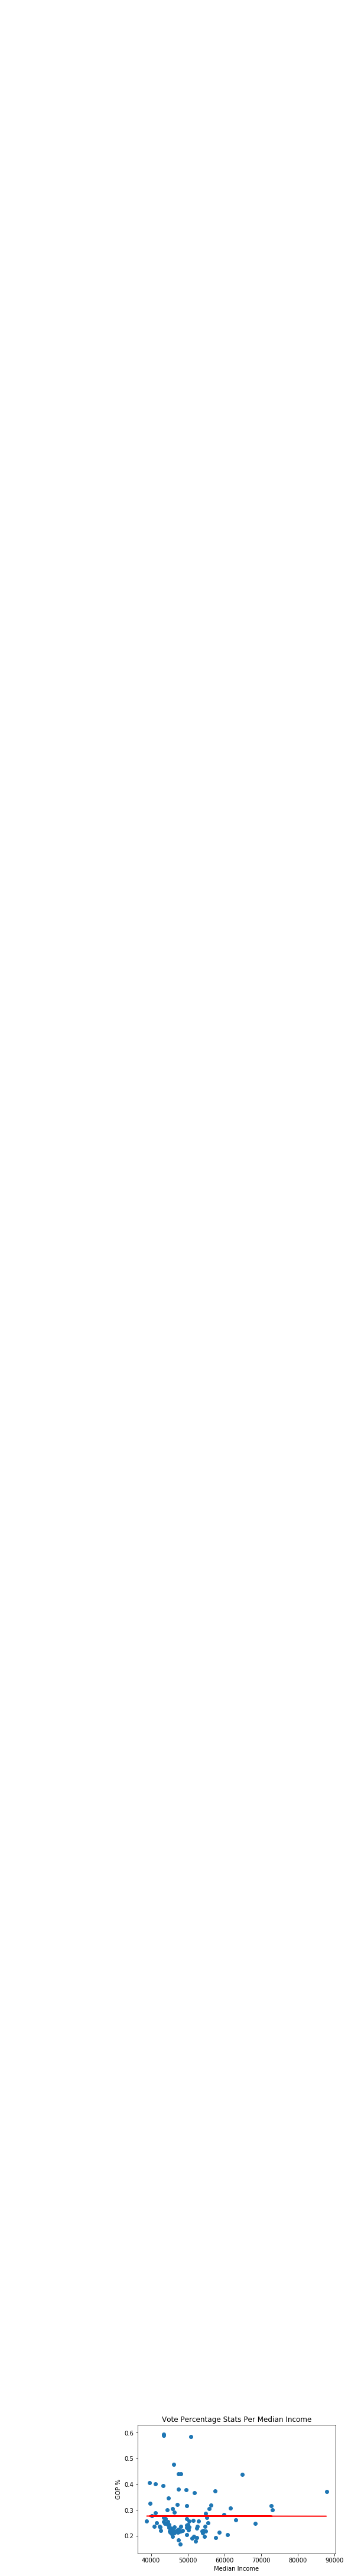

<Figure size 432x288 with 0 Axes>

In [53]:
#Median Income vs. DEM %
yaxis = income_vote_share['DEM %']
xaxis = income_vote_share['Median Income']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Median Income')
plt.ylabel('GOP %')
plt.title(f'Vote Percentage Stats Per Median Income')
#plt.savefig(f"Images/Northern Hemisphere Max Temperature Vs Latitude")
#plt.xlim(0,80)
plt.show()
plt.tight_layout()

In [40]:
aamerican_vote_share = result_df[['County', 'DEM %', 'GOP %', 'Population (African-American)']]
wamerican_vote_share = result_df[['County', 'DEM %', 'GOP %', 'Population (White)']]

R squared: 0.5933115474479609


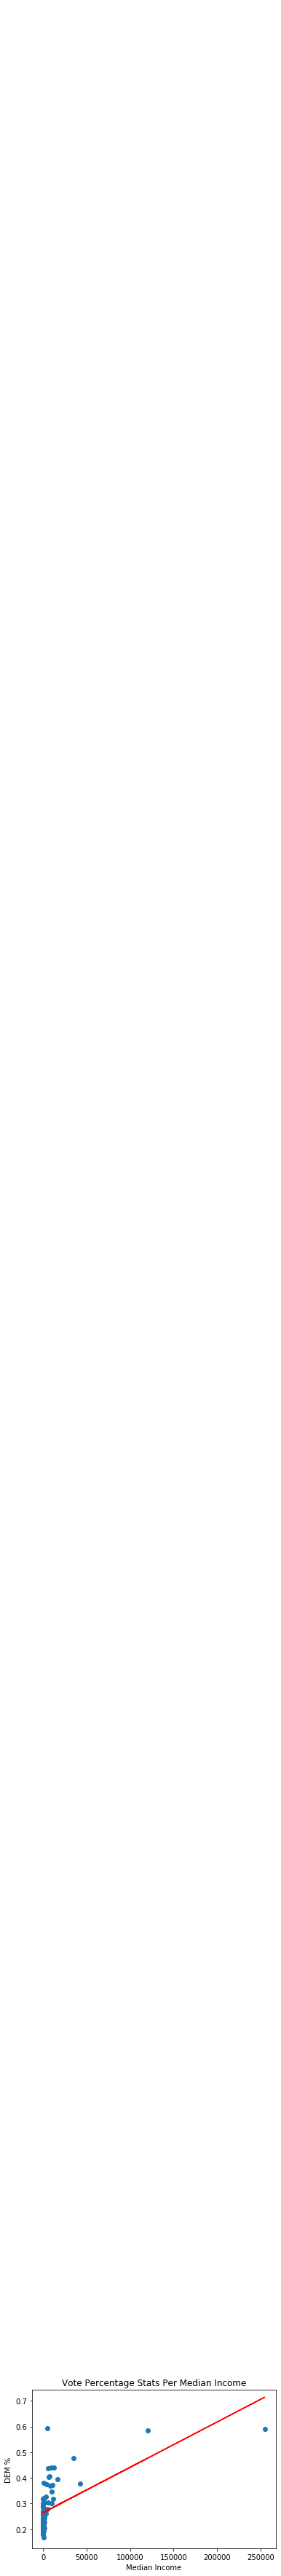

In [41]:
#Median Income vs. DEM %
yaxis = aamerican_vote_share['DEM %']
xaxis = aamerican_vote_share['Population (African-American)']
linear_regression_plotter(xaxis, yaxis)
plt.xlabel('Median Income')
plt.ylabel('DEM %')
plt.title(f'Vote Percentage Stats Per Median Income')
#plt.savefig(f"Images/Northern Hemisphere Max Temperature Vs Latitude")
#plt.xlim(0,80)
plt.show()

R squared: -0.7422427157700704


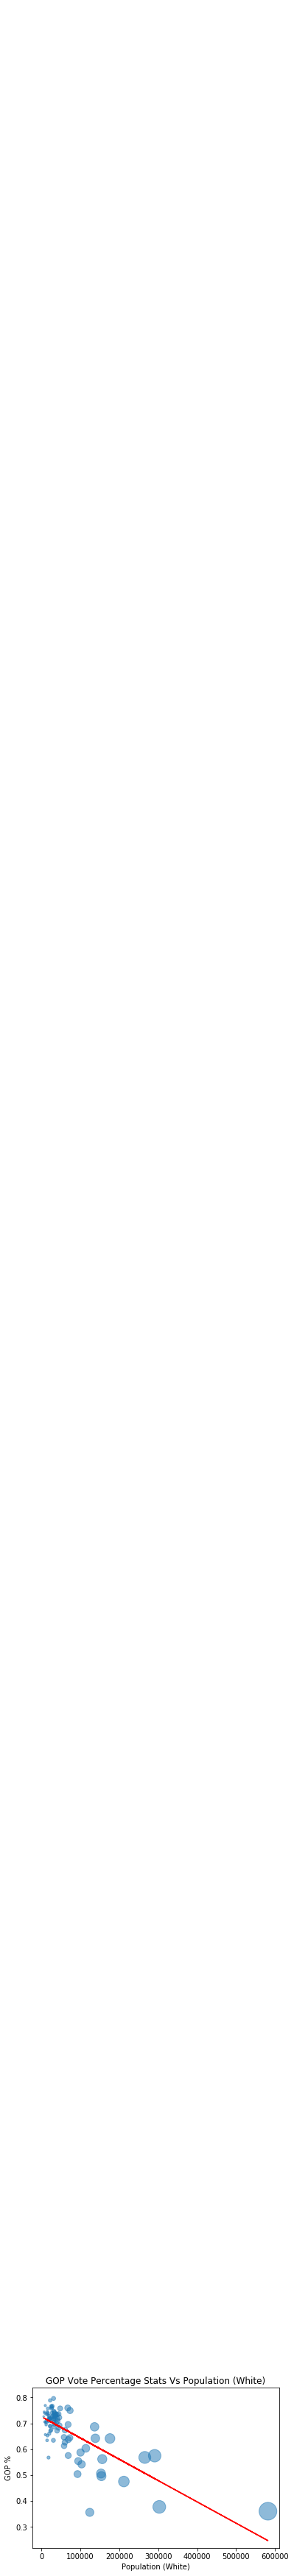

In [52]:
#Median Income vs. DEM %
yaxis = wamerican_vote_share['GOP %']
xaxis = wamerican_vote_share['Population (White)']
zvalue = wamerican_vote_share['Population (White)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis, yaxis, s=zvalue/1000, alpha=0.5)
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"R squared: {rvalue}")
plt.xlabel('Population (White)')
plt.ylabel('GOP %')
plt.title(f'GOP Vote Percentage Stats Vs Population (White)')
#plt.savefig(f"Images/Northern Hemisphere Max Temperature Vs Latitude")
#plt.xlim(0,80)
plt.show()